In [ ]:

# import pandas as pd
# import os

# # Load full dataset
# df_full = pd.read_csv("Fraud.csv")

# # Create sample of 10,000 rows
# df_sample = df_full.sample(100000, random_state=42)
# df_sample.to_csv("sample_fraud.csv", index=False)

# # Load sample
# df = pd.read_csv("sample_fraud.csv")


# df.head()

# # Shape & size
# print(df.shape)
# file_size = os.path.getsize("sample_fraud.csv") / (1024 * 1024)
# print(f"File Size: {file_size:.2f} MB")


In [75]:
# import numpy as np

# chunk1 = df.iloc[:500000]
# chunk2 = df.iloc[500000:1000000]
# chunk3 = df.iloc[1000000:]

# chunk1.to_csv("fraud_part1.csv", index=False)
# chunk2.to_csv("fraud_part2.csv", index=False)
# chunk3.to_csv("fraud_part3.csv", index=False)

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

load the dataset


In [77]:
df = pd.read_csv("fraud_part1.csv")
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
99996,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
99997,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
99998,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


In [78]:
df.head(5)     ## first 5 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [79]:
df.tail(5)       ## last 5 row


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
99995,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
99996,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
99997,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
99998,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0
99999,545,PAYMENT,31617.57,C1314607150,10626.00,0.00,M1600734161,0.00,0.00,0,0


In [80]:
df.columns              ## determine the name of columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [81]:
df.shape            ## rows and columns number

(100000, 11)

In [82]:
df.size                ## rows * columns == total cells

1100000

In [83]:
type(df)           ## determine the type of dataframe


pandas.core.frame.DataFrame

In [84]:
df.index             ## determine the index of rows

RangeIndex(start=0, stop=100000, step=1)

In [85]:
df.isnull().sum()          ##determine the null values


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [86]:
df.info()       ## complete information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [87]:
df.duplicated().sum()      ## check is there any duplicate in dataframe

np.int64(0)

In [88]:
df.drop_duplicates(inplace=True)
                                    ## drop that duplicate


In [89]:
df.isFlaggedFraud                   ## print isFlaggedFraud column

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: isFlaggedFraud, Length: 100000, dtype: int64

In [90]:
df.isFraud                    ## determine column isFraud

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: isFraud, Length: 100000, dtype: int64

In [91]:
df.sort_values(by= ["isFraud","step"])         ## sort the value of two columns

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
776,1,PAYMENT,4189.31,C978035840,124618.50,120429.20,M666312528,0.00,0.00,0,0
5465,1,TRANSFER,412906.88,C478182173,10353.00,0.00,C1068824137,20894.07,265092.36,0,0
9766,1,CASH_IN,317393.38,C1197721383,8906617.38,9224010.75,C1286084959,1175483.65,2107778.11,0,0
12178,1,CASH_IN,18194.34,C1063801186,3324026.03,3342220.38,C1335050193,278369.57,53743.06,0,0
13217,1,PAYMENT,885.95,C569976699,588.00,0.00,M538618049,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
52765,707,TRANSFER,4676.42,C1043527721,4676.42,0.00,C2017082627,0.00,0.00,1,0
65702,717,TRANSFER,751854.42,C438492576,751854.42,0.00,C1547774337,0.00,0.00,1,0
63243,721,CASH_OUT,23639.56,C427738422,23639.56,0.00,C950599910,140063.53,163703.10,1,0
78960,722,TRANSFER,21960.02,C1438426689,21960.02,0.00,C213308373,0.00,0.00,1,0


In [92]:
df = df.drop(columns=["type", "nameDest", "nameOrig", "isFlaggedFraud"])     ## delete these columns


In [93]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,278,330218.42,20866.00,351084.42,452419.57,122201.15,0
1,15,11647.08,30370.00,18722.92,0.00,0.00,0
2,10,152264.21,106589.00,258853.21,201303.01,49038.80,0
3,403,1551760.63,0.00,0.00,3198359.45,4750120.08,0
4,206,78172.30,2921331.58,2999503.88,415821.90,337649.60,0
...,...,...,...,...,...,...,...
99995,235,371042.71,1699365.85,2070408.56,4301572.86,3930530.15,0
99996,357,19494.57,1921089.11,1940583.68,75635.52,56140.95,0
99997,369,141519.24,0.00,0.00,12853274.23,12994793.47,0
99998,154,635412.68,58610.00,694022.68,0.00,0.00,0


In [94]:
X = df.drop("isFraud", axis=1)         ## take rest columns from "isFraud"
y = df["isFraud"]                      ## only take the column "isFraud"

In [95]:
from sklearn.model_selection import train_test_split          ## train,test library

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state=42)  ## initialize values of training and testing
                                                                                       ##  test  contain 0.3 == 30% data and  70% for training
                                                                                       ## random state = 42 after each cycle value remain same



In [96]:
print(X_train.shape,y_train.shape)      ## after training and testing check the shape of training data

(70000, 6) (70000,)


In [97]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())               ## check null values in x_test and x_train

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64
step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [98]:
# X_test = X_test.fillna(0)         ## we will fill value 0 in place of 1 or we can also fill the mean here  because model can't handle naN instead of numeric 0,1


In [99]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())      ## check null values in y_test and y_train


0
0


In [100]:
# test_df = pd.concat([X_test, y_test], axis=1)       ## now we will check y_test and columns in x_test


# test_df = test_df.dropna(subset=["isFraud"])        ## drop those rows having y_test is naN

# Socho tumhare paas ek answer sheet hai (X_test) aur uske correct answers (y_test) alag file me hain.
# Kuch answers missing hain. Tum dono ko ek table me jodte ho, dekhte ho kaunse blank hain, unhe hata ke baaki valid answers ke saath model ko test karte ho



In [101]:
# X_test = test_df.drop("isFraud", axis=1)     ## again assign values
# y_test = test_df["isFraud"]

In [102]:
X_test = df.drop("isFraud", axis=1)     ## again assign values
y_test = df["isFraud"]


class weight = Automatically adjusts weight for each class based on how many samples there are
class_weight='balanced'

Model sees:

    99,900 "Not Fraud"

    100 "Fraud"

Predicts: always "Not Fraud"

Accuracy: 99.9%

But zero frauds caught

In [103]:
from sklearn.linear_model import LogisticRegression                   ## import logistic regression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score ##auuracy,report,check the fraud things like as probability
# # # separate the ability of model .Perfect = 1.0.Random guess = 0. Below 0.5 = model is confused

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced') ## determine the model :iteration = 1000,

# # ## if we dont use class weight  model always give the not fraud result

lr_model.fit(X_train, y_train)          ## fit training data to model


y_pred = lr_model.predict(X_test)                ## predict y for testing. internally model check the probability >= 0.5 then predict 1 otherwise 0
y_proba = lr_model.predict_proba(X_test)[:, 1]     ## predict probability of being fraud

print("Accuracy:", accuracy_score(y_test, y_pred))     ## accuracy of y_test and y_pred
print("ROC AUC:", roc_auc_score(y_test, y_proba))       ## roc_auc_score of y_test and y_probability
print(classification_report(y_test, y_pred))             ## classification report

Accuracy: 0.98541
ROC AUC: 0.9949204974759092
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99859
           1       0.09      0.99      0.16       141

    accuracy                           0.99    100000
   macro avg       0.54      0.99      0.58    100000
weighted avg       1.00      0.99      0.99    100000



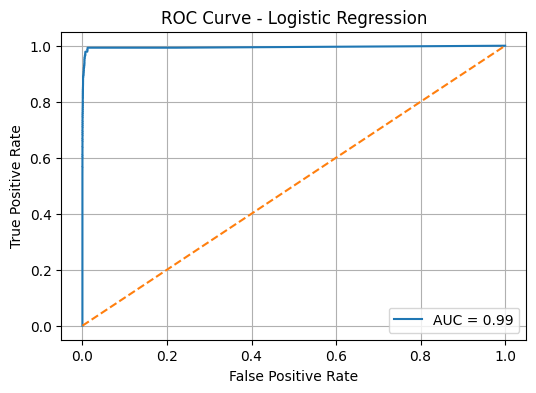

In [104]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)      ## true positive rate,false positive rate,threshold = different values between 1 to 0
roc_auc = auc(fpr, tpr)                   ## auc = area under the curve

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")         ## rounding off upto 2 points
plt.plot([0, 1], [0, 1], linestyle='--')                  ## diagonal representation via ---
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()